In [42]:
import pandas as pd 
import numpy as np
import nltk
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.models import Sequential
from keras.layers import Embedding,Dropout,Dense,LSTM,Flatten

# importing the training dataset

In [27]:
data=pd.read_csv('/home/kd710306/Documents/nlp spooky/train.csv')
data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


# Removing the stopwords from the text using nltk corpus

In [28]:
from nltk.corpus import stopwords
st=stopwords.words('english')
data['text']=data['text'].apply(lambda x:" ".join(i for i in x.split(" ") if i not in st))

## Stemming and lemmatizing the text(Can do any one of them)

In [29]:
from nltk.stem import SnowballStemmer
stm=SnowballStemmer('english')
data['text']=data['text'].apply(lambda x:" ".join(stm.stem(i) for i in x.split(" ")))

In [30]:
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()
data['text']=data['text'].apply(lambda x:" ".join(lem.lemmatize(i) for i in x.split(" ")))
data.head()

,id,text,author
0,id26305,"this process, however, afford mean ascertain d...",EAP
1,id17569,it never occur fumbl might mere mistake.,HPL
2,id11008,"in left hand gold snuff box, which, caper hill...",EAP
3,id27763,how love spring a look windsor terrac sixteen ...,MWS
4,id12958,"find noth else, even gold, superintend abandon...",HPL


## Data after removing stop words,stemming and lemmatizing it

In [31]:
data.head()

,id,text,author
0,id26305,"this process, however, afford mean ascertain d...",EAP
1,id17569,it never occur fumbl might mere mistake.,HPL
2,id11008,"in left hand gold snuff box, which, caper hill...",EAP
3,id27763,how love spring a look windsor terrac sixteen ...,MWS
4,id12958,"find noth else, even gold, superintend abandon...",HPL


## Tokenizing(Splitting the sentence into each word) using keras tokenizer 

In [32]:
from keras.preprocessing.text import Tokenizer
data['text'] = data['text'].str.replace('[^\w\s]','')
tokenizer=Tokenizer()
tokenizer.fit_on_texts(data['text'])
data['text']=tokenizer.texts_to_sequences(data['text'])
data.head()

,id,text,author
0,id26305,"[25, 1971, 109, 650, 142, 2463, 3540, 3338, 1,...",EAP
1,id17569,"[3, 30, 723, 3747, 22, 184, 3748]",HPL
2,id11008,"[18, 81, 61, 778, 4344, 522, 273, 10083, 363, ...",EAP
3,id27763,"[450, 42, 613, 20, 33, 762, 3177, 2776, 2558, ...",MWS
4,id12958,"[126, 151, 2363, 13, 778, 3541, 1336, 13386, 3...",HPL


## Labeling the author part to convert it to different classes in integer form 

In [38]:
lbe=LabelEncoder()
x=lbe.fit_transform(data['author'])
x

array([0, 1, 0, ..., 0, 0, 1])

## One hot encoding the classes so that each class have equal weight in our model

In [39]:
onh=OneHotEncoder()
x=x.reshape(-1,1)
y=onh.fit_transform(x)

/home/kd710306/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


## Padding the text vector so that each input in our neural net has same length

In [40]:
from keras.preprocessing.sequence import pad_sequences
d=data['text'].values
d=pad_sequences(d,maxlen=100)

## Spliting the data in training and validation sets

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(d,y,test_size=0.1)

### MODEL

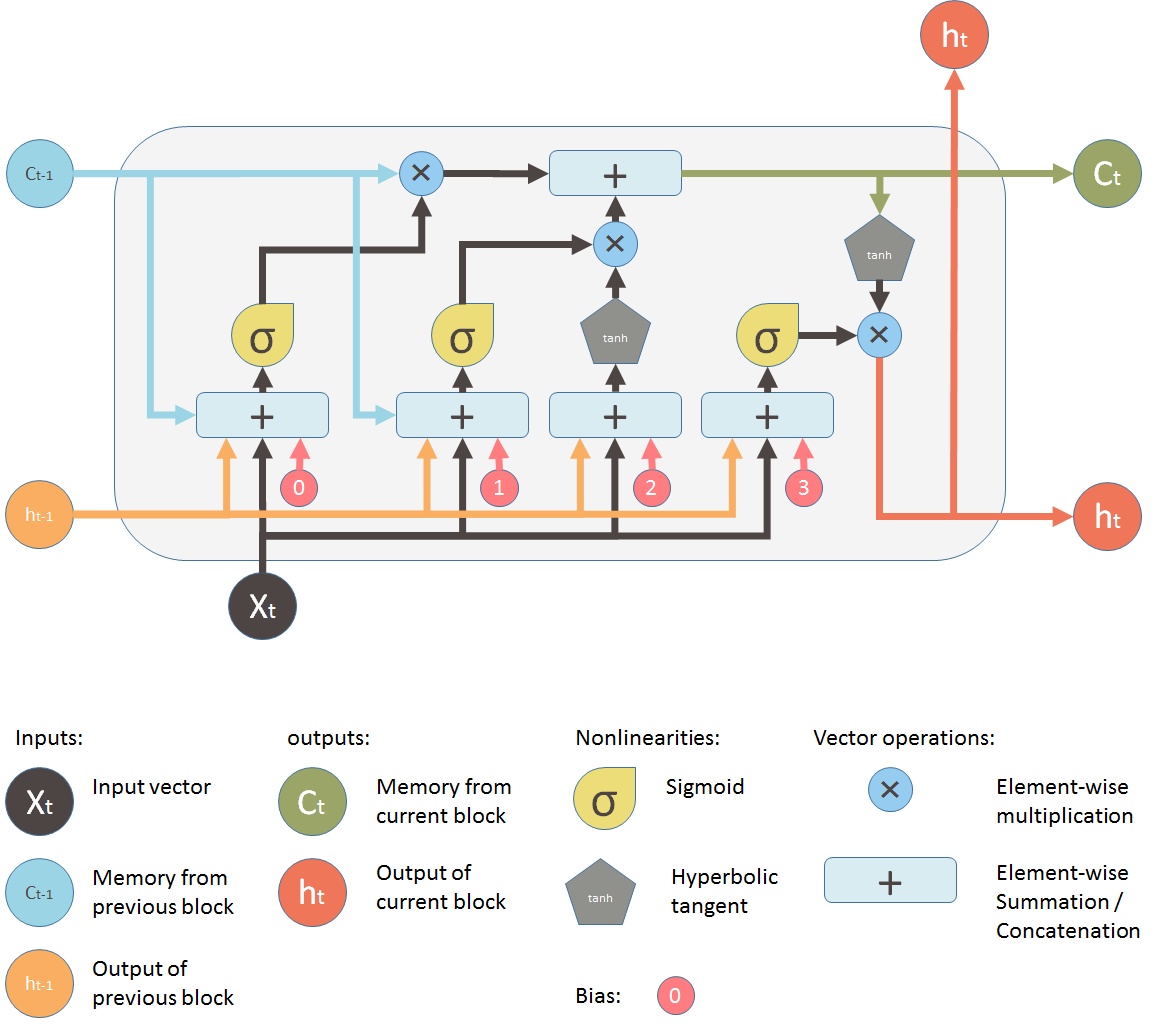

In [51]:
from IPython.display import Image
Image(filename='/home/kd710306/Documents/1_laH0_xXEkFE0lKJu54gkFQ.png',width=500,height=500)

## Setting up the Lstm neural network using keras sequential model

In [44]:
mdl=Sequential()
mdl.add(Embedding(len(tokenizer.word_index)+1,300,input_length=100))
mdl.add(LSTM(units=50,return_sequences=True))
mdl.add(Dropout(0.25))
mdl.add(LSTM(units=50,return_sequences=True))
mdl.add(Dropout(0.25))
mdl.add(Flatten())
mdl.add(Dense(3,activation='softmax'))
mdl.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Training the model and checking training and validation losses

In [64]:
mdl.fit(x_train,y_train,epochs=4,batch_size=512,validation_data=(x_test,y_test))

Train on 17621 samples, validate on 1958 samples
Epoch 1/4
17621/17621 [==============================] - 94s 5ms/step - loss: 1.0437 - acc: 0.4607 - val_loss: 0.8480 - val_acc: 0.6333
Epoch 2/4
17621/17621 [==============================] - 87s 5ms/step - loss: 0.5546 - acc: 0.7800 - val_loss: 0.5153 - val_acc: 0.8044
Epoch 3/4
17621/17621 [==============================] - 80s 5ms/step - loss: 0.2928 - acc: 0.8882 - val_loss: 0.5160 - val_acc: 0.8100
Epoch 4/4
17621/17621 [==============================] - 79s 4ms/step - loss: 0.1887 - acc: 0.9287 - val_loss: 0.5905 - val_acc: 0.8223


## Loading the file whose prediction are to be submitted in kaggle

In [46]:
p_data=pd.read_csv('/home/kd710306/Documents/nlp spooky/test.csv')
p_data.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


## Applying all the previous methods to it 

In [47]:
p_data['text']=p_data['text'].apply(lambda x:" ".join(i for i in x.split(" ") if i not in st))
p_data['text'] = p_data['text'].str.replace('[^\w\s]','')
p_data['text']=tokenizer.texts_to_sequences(p_data['text'])
d1=p_data['text'].values
d1=pad_sequences(d1,maxlen=100)

## Predicting the authors

In [48]:
y1=mdl.predict(d1)

In [49]:
from collections import defaultdict
d=defaultdict(list)
sol1=pd.DataFrame(p_data['id'])
for i in range(len(y1)):
        d['EAP'].append(y1[i][0]/sum(y1[i]))
        d['HPL'].append(y1[i][1]/sum(y1[i]))
        d['MWS'].append(y1[i][2]/sum(y1[i]))
sol2=pd.DataFrame(d)
sol=sol1.join(sol2)
sol.tail()

,id,EAP,HPL,MWS
8387,id11749,0.339218,0.319445,0.341336
8388,id10526,0.339012,0.319979,0.341010
8389,id13477,0.338189,0.319949,0.341862
8390,id13761,0.338572,0.321039,0.340389
8391,id04282,0.337290,0.319557,0.343152


## Saving in csv

In [69]:
sol.to_csv("res.csv", encoding='utf-8')